In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [3]:
df=pd.read_csv("/content/student_data.csv")
df.head()

,Student_ID,Attendance,AssignmentScore,ExamScore
0,S1,88,92,94
1,S2,78,41,75
2,S3,64,59,63
3,S4,92,67,49
4,S5,57,86,79


In [4]:
X=df[["Attendance","AssignmentScore","ExamScore"]]

In [5]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

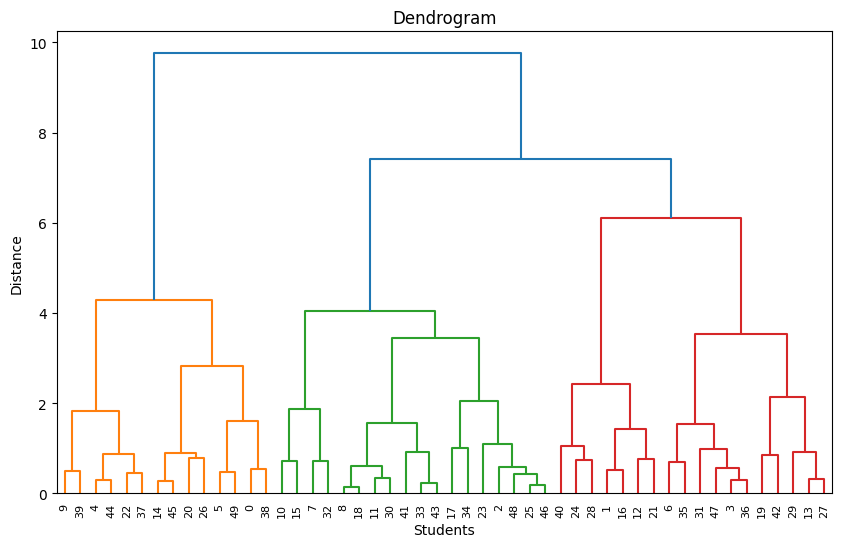

In [6]:
plt.figure(figsize=(10,6))
dendrogram=shc.dendrogram(shc.linkage(X_scaled,method="ward"))
plt.title("Dendrogram")
plt.xlabel("Students")
plt.ylabel("Distance")
plt.show()

In [8]:
hc=AgglomerativeClustering(n_clusters=3,linkage="ward")
labels=hc.fit_predict(X_scaled)
df['Cluster']=labels
df.head()

,Student_ID,Attendance,AssignmentScore,ExamScore,Cluster
0,S1,88,92,94,1
1,S2,78,41,75,0
2,S3,64,59,63,2
3,S4,92,67,49,0
4,S5,57,86,79,1


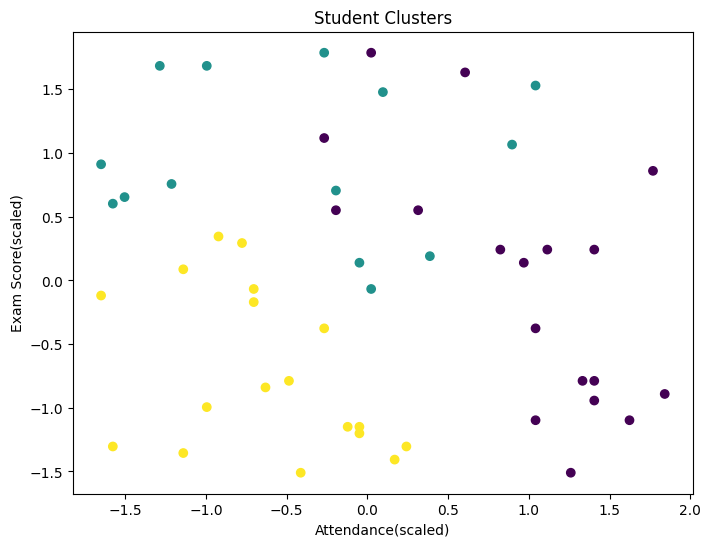

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,2], c=labels)
plt.xlabel("Attendance(scaled)")
plt.ylabel("Exam Score(scaled)")
plt.title("Student Clusters")
plt.show()

In [12]:
df.groupby('Cluster').mean(numeric_only=True)

,Attendance,AssignmentScore,ExamScore
Cluster,,,
0,87.055556,61.777778,64.166667
1,67.500000,90.000000,82.500000
2,65.111111,60.777778,50.277778
